# IBM Developer Skills Network

# Digit Classification with Softmax

In [1]:
import torch
import torch.nn as nn # neural network
import torchvision.transforms as transforms # to transform data
import torchvision.datasets as dsets # to get the digit dataset
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Function to plot parameters
def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            # Set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            # Plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        # Ensure the plot is shown correctly with multiple plots
        # in a single Notebook cell.
    plt.show()

In [11]:
# Plot the data
def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))

# Make Some Data

In [4]:
# Creat and print the training dataset
train_dataset = dsets.MNIST(root='./data', train=True, download=True,transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Failed to download (trying next):
HTTP Error 503: Service Unavailable



9913344it [00:08, 1214354.68it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



29696it [00:00, 149217.46it/s]                        


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



1649664it [00:01, 829346.31it/s]                              


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable



5120it [00:00, 1706654.73it/s]          
C:\Users\hp\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw

Processing...
Done!
Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [5]:
# Create and print the validation dataset

validation_dataset = dsets.MNIST(root='./data', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()


In [6]:
# Print the 1st image and label
print('First image and label', train_dataset[0])

First image and label (tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 

In [9]:
# Print the label
print('The label: ', train_dataset[3][1])

The label:  1


The image is: None


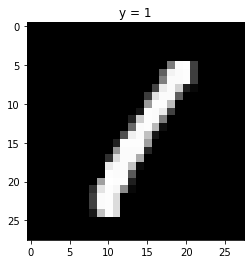

In [12]:
# Plot the 4th sample
print('The image is:', show_data(train_dataset[3]))

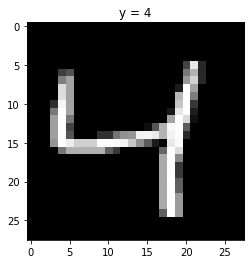

In [13]:
show_data(train_dataset[2])

# Build a Softmax Classifier

In [14]:
# Define softmax classifier class
# Inherits nn.Module which is the base class for all neural networks
class SoftMax(nn.Module):
    
    # Constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        # Creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        # Runs the x value through the single layers defined above
        z = self.linear(x)
        return z

In [15]:
# print the shape of the training dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [16]:
# Set the input size & output size
input_dim = 28 * 28  # to flatten the image
output_dim = 10

# Define the Softmax Classifier, Criterion Function, Optimizer and Train the Model

In [17]:
# Create the model
# Input dim is 28*28 which is the image converted to a tensor
# Output dim is 10 because there are 10 possible digits the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [18]:
# View the size of the model parameters
print('W: ', list(model.parameters())[0].size())  # weight
print('b: ', list(model.parameters())[1].size())  # bias

W:  torch.Size([10, 784])
b:  torch.Size([10])


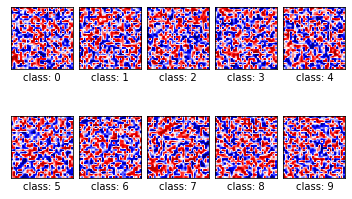

In [19]:
# Plot the model parameters for each class
# Since the model has not been trained yet the parameters look random

PlotParameters(model)

In [20]:
# Make a prediction
X = train_dataset[0][0]

print(X.shape)

X = X.view(-1, 28*28) # Flatten the data 28*28 => 784
print(X.shape)

model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[-0.0737, -0.0538,  0.2316, -0.0101,  0.0575, -0.2623, -0.0048,  0.4860,
          0.1610, -0.1996]], grad_fn=<AddmmBackward>)

In [21]:
# Define learning rate
learning_rate = 0.1

# Optimizer will update model parameters using the learning rate
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Build the Criterion on Cross Entropy Loss
criterion = nn.CrossEntropyLoss()

# Create a training data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)

# Created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

# How Cross Entropy Loss uses Softmax

We have X which is the X values of the first image and actual which is the the digit class the image belongs to. The output model_output is the value the model assigns to each class for that image.

Output:  tensor([[-0.0737, -0.0538,  0.2316, -0.0101,  0.0575, -0.2623, -0.0048,  0.4860,
          0.1610, -0.1996]], grad_fn=<AddmmBackward>)
Actual: tensor([5])


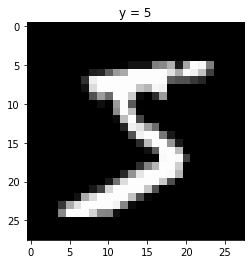

In [22]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)

In [23]:
criterion(model_output, actual)

tensor(2.6204, grad_fn=<NllLossBackward>)

Cross Entropy Loss takes probabilities and we can see that model_output are not probabilities, this is where softmax comes in

In [24]:
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)

tensor([[0.0879, 0.0897, 0.1193, 0.0937, 0.1002, 0.0728, 0.0942, 0.1538, 0.1111,
         0.0775]], grad_fn=<SoftmaxBackward>)


Now that we have probabilities, we can just calculate the negative log of the probability of the class that this image belongs to. The image belongs to the target class so we calculate the negative log of the probability at the target index.

In [25]:
-1 * torch.log(probability[0][actual])

tensor([2.6204], grad_fn=<MulBackward0>)

# Train

In [26]:
# Number of times we train our model using the training data
n_epochs = 10

loss_list = []
accuracy_list = []

N_test = len(validation_dataset)

# Function to train the model based on number of epochs
def train_model(n_epochs):
    # Loops n_epochs times
    for epoch in range(n_epochs):
        # For each batch in the train loader
        for x, y in train_loader:
            # Resets the calculated gradient value, this must be done each time as it accumulates if we do not reset
            optimizer.zero_grad()
            # Makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            # Calculates loss between the model output and actual class
            loss = criterion(z, y)
            # Calculates the gradient value with respect to each weight and bias
            loss.backward()
            # Updates the weight and bias according to calculated gradient value
            optimizer.step()
        
        # Each epoch we check how the model performs with data it has not seen which is the validation data, we are not training here
        correct = 0
        # For each batch in the validation loader
        for x_test, y_test in validation_loader:
            # Makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            # Finds the class with the highest output
            _, yhat = torch.max(z.data, 1)
            # Checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        # Calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        # Keeps track loss
        loss_list.append(loss.data)
        # Keeps track of the accuracy
        accuracy_list.append(accuracy)

# Function call
train_model(n_epochs)

# Analyze the Results

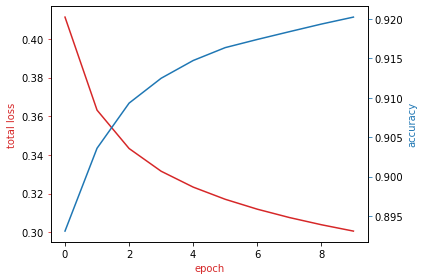

In [27]:
# Plot the loss and accuracy

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

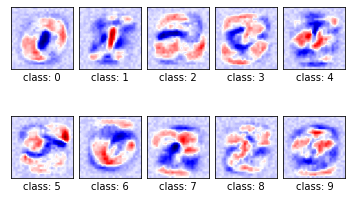

In [28]:
# Plot the parameters

PlotParameters(model)

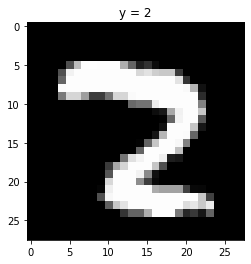

yhat: tensor([7])
probability of class  0.6802882552146912


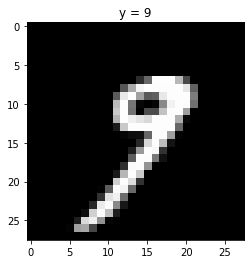

yhat: tensor([7])
probability of class  0.7061946392059326


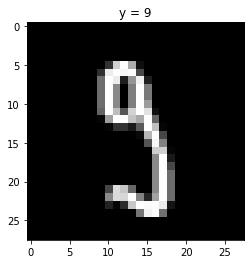

yhat: tensor([5])
probability of class  0.7300199270248413


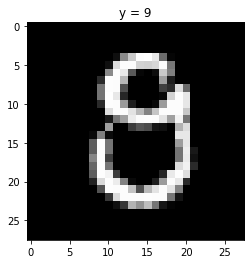

yhat: tensor([8])
probability of class  0.3729541003704071


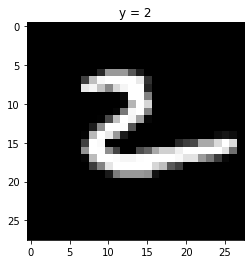

yhat: tensor([6])
probability of class  0.5232502818107605


In [29]:
# Plot the misclassified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break      

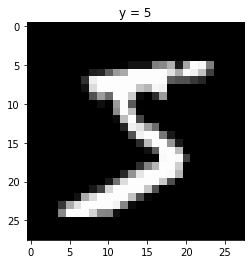

yhat: tensor([5])
probability of class  0.8525345325469971


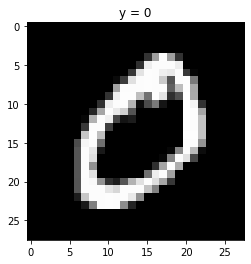

yhat: tensor([0])
probability of class  0.9997225403785706


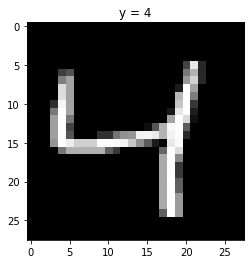

yhat: tensor([4])
probability of class  0.8714980483055115


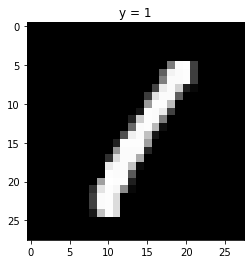

yhat: tensor([1])
probability of class  0.9652340412139893


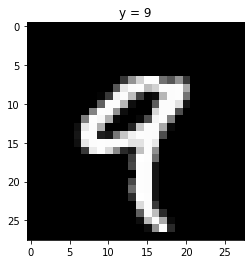

yhat: tensor([9])
probability of class  0.9271076321601868


In [30]:
# Plot the classified samples
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  